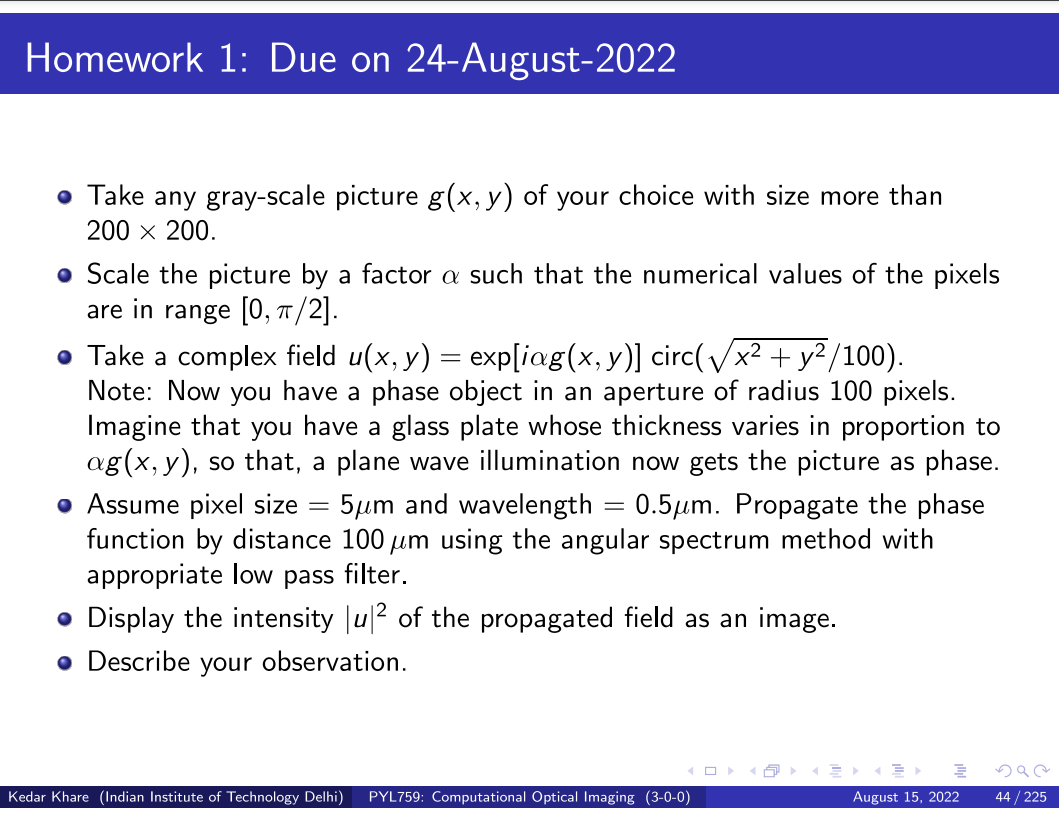

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [3]:
input = 'hw1.jpg'
img = Image.open(input)
img = img.convert('L')
img = img.resize((200,200))
img_arr = np.asarray(img)

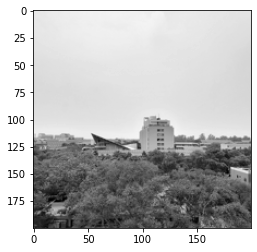

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(img_arr, cmap='gray')

In [5]:
N = img.size[0]

#pixel length
p = 5e-6

wavelength = 500e-9
k = 2*math.pi/wavelength
z = 100e-06
f0 = 1/(wavelength * math.sqrt(1+(2*z/(N*p))**2))

scale = math.pi/(np.max(img_arr)*2)

In [6]:
x,y = np.meshgrid(np.linspace(-img.size[0]/2,img.size[0]/2,img.size[0]), np.linspace(-img.size[1]/2,img.size[1]/2,img.size[1]))
fx,fy = np.meshgrid(np.linspace(-0.5,0.5-1/img.size[0],img.size[0]), np.linspace(-0.5,0.5-1/img.size[1],img.size[1]))

x *= p
y *= p
fx /= p
fy /= p

In [7]:
circ = (abs(x) <= np.sqrt((100*p)**2 - y**2)) * (abs(y) <= np.sqrt((100*p)**2 - x**2))
u = np.exp(1j*scale*img_arr)*circ

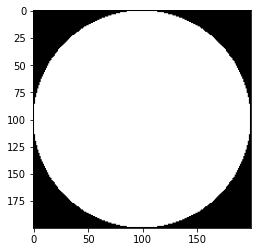

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(np.abs(u), cmap='gray')

In [9]:
'''
    @params initial_field: Field at z=0
    @params z: distance through field has to propagate
    @params wavelength: wavelength of field
    @params filtering: boolean
                            True -> Low Pass Filter will be applied
                            False-> No filtering
'''
def propagate_field(initial_field, z, wavelength, filtering):
    k = 2*math.pi/wavelength
    
    A = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u)))
    
    alpha = np.sqrt(k**2 - 4*math.pi**2 *(fx**2+fy**2))
    H = np.exp(1j*alpha*z)
    
    # Field after traversing distance z
    if(filtering):
        f0 = 1/(wavelength * math.sqrt(1+(2*z/(N*p))**2))
        LP = (abs(fx) <= np.sqrt(f0**2 - fy**2)) * (abs(fy) <= np.sqrt(f0**2 - fx**2))
        return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(A*H*LP)))
    else:
        return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(A*H)))

In [10]:
# # Low Pass Filter
# LP = (abs(fx) <= np.sqrt(f0**2 - fy**2)) * (abs(fy) <= np.sqrt(f0**2 - fx**2))

# # Field in Fourier Domain
# A = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u)))


# alpha = np.sqrt(k**2 - 4*math.pi**2 *(fx**2+fy**2))
# H = np.exp(1j*alpha*z)

# # Field after traversing distance z
# a1 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(A*H*LP)))

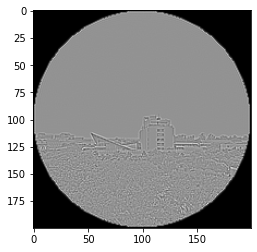

In [11]:
a1 = propagate_field(u, z, wavelength, False)
# a1 = a1*255/np.max(a1)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.savefig(input+"out.png")
plt.imshow(((np.abs(a1)/np.max(np.abs(a1)))**2)*255, cmap='gray')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4196\3740246613.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


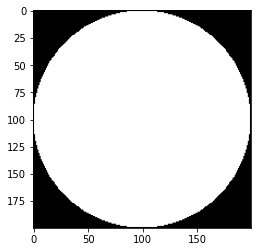

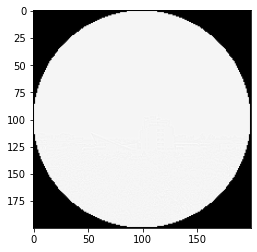

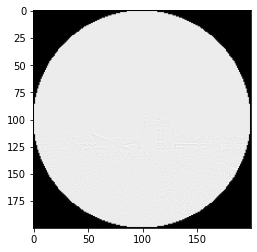

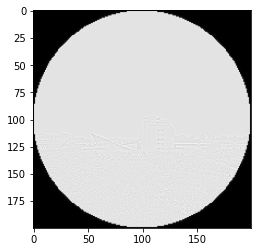

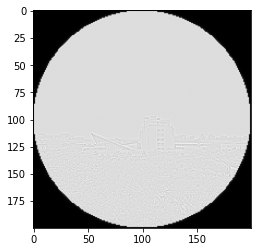

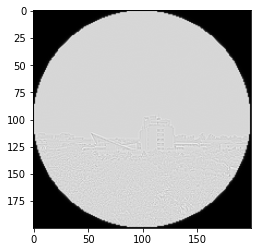

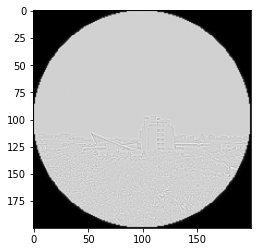

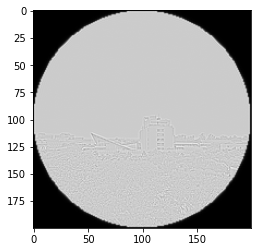

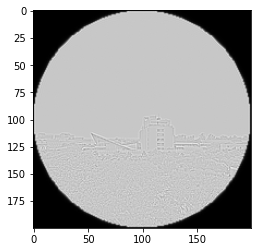

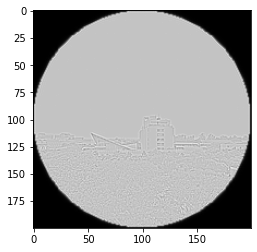

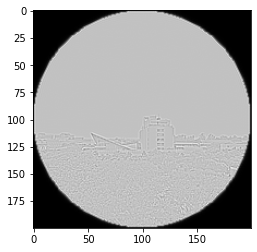

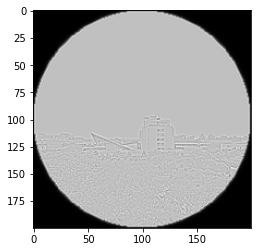

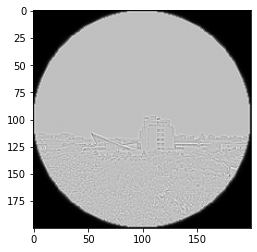

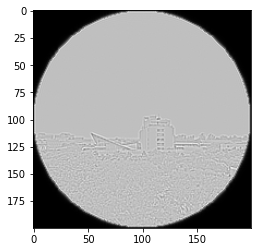

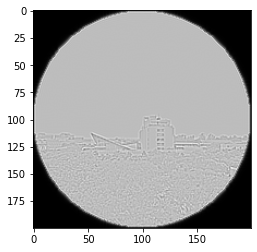

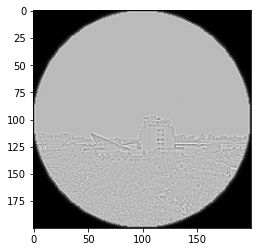

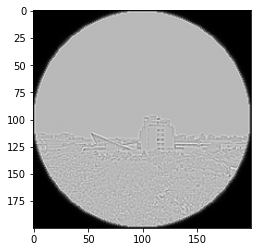

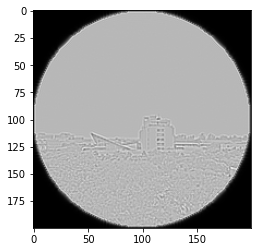

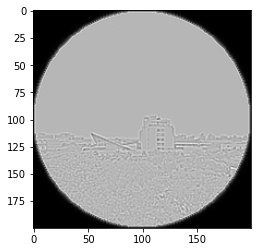

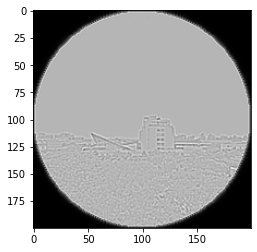

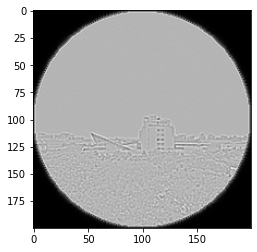

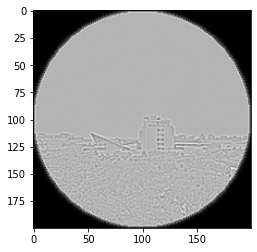

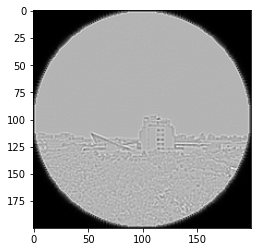

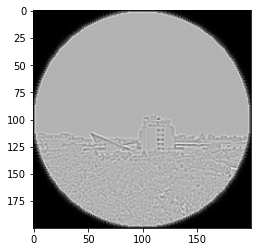

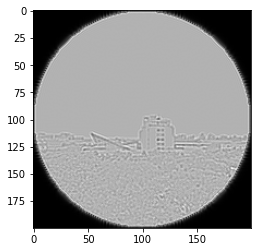

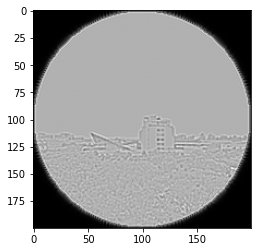

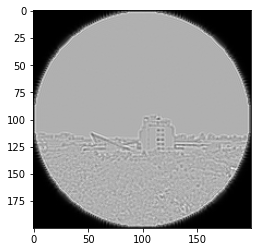

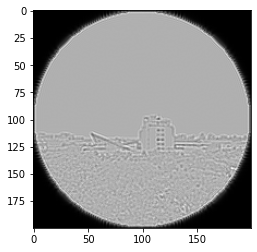

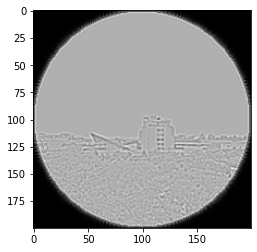

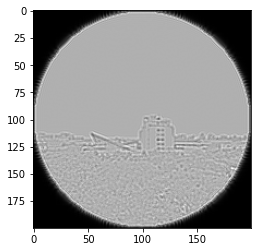

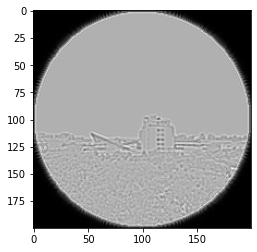

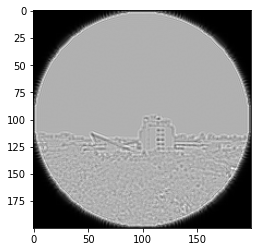

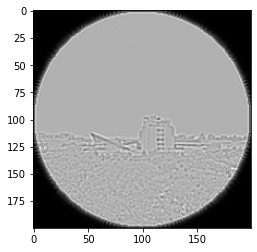

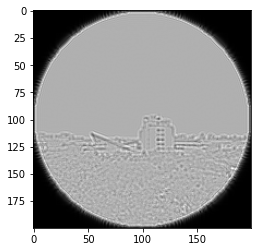

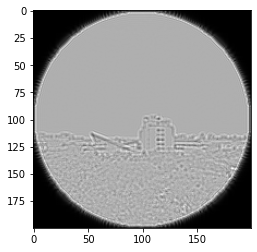

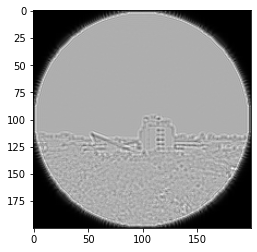

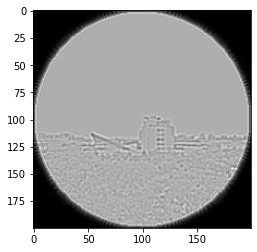

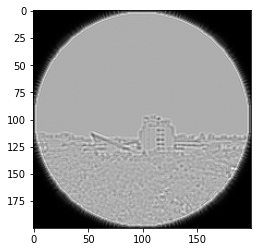

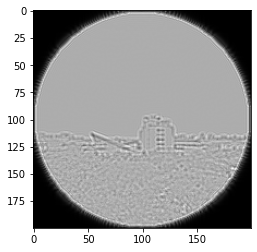

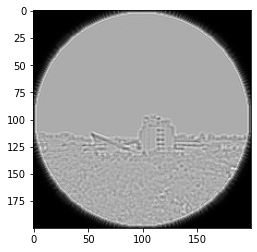

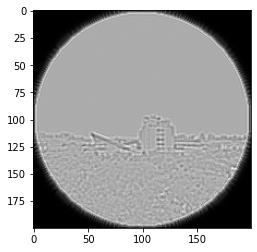

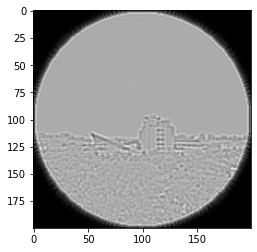

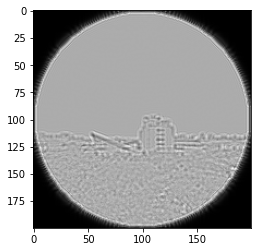

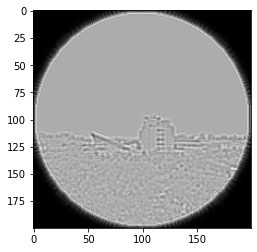

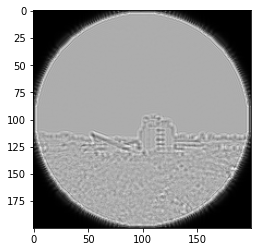

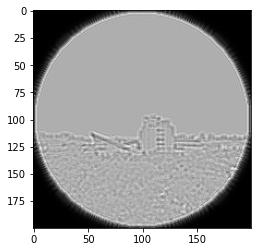

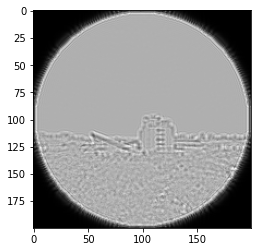

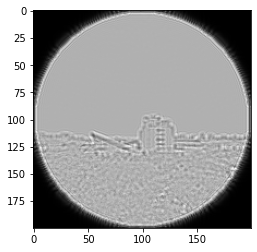

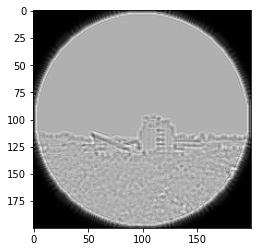

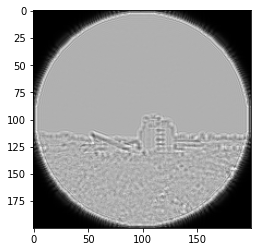

In [15]:
z = 0
for i in range(50,100):
    f0 = 1/(wavelength * math.sqrt(1+(2*z/(N*p))**2))
    # Low Pass Filter
#     LP = (abs(fx) <= np.sqrt(f0**2 - fy**2)) * (abs(fy) <= np.sqrt(f0**2 - fx**2))

#     # Field in Fourier Domain
#     A = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u)))


#     alpha = np.sqrt(k**2 - 4*math.pi**2 *(fx**2+fy**2))
#     H = np.exp(1j*alpha*z)

#     # Field after traversing distance z
#     a1 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(A*H*LP)))

    a1 = propagate_field(u, z, wavelength, True)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.imshow(np.abs(a1), cmap='gray')
#     print(z)
    
    z+=10e-06